In [ ]:
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, RNN, SimpleRNN, GRU
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras import regularizers
    import tensorflow.keras.utils as ku
    import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
tokenizer = Tokenizer()
data = open('/content/wonderland.txt').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [ ]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 580, input_length=max_sequence_len-1))
model.add(LSTM(250, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(180))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 580)           1362420   
                                                                 
 lstm (LSTM)                 (None, 17, 250)           831000    
                                                                 
 dropout (Dropout)           (None, 17, 250)           0         
                                                                 
 lstm_1 (LSTM)               (None, 180)               310320    
                                                                 
 dense (Dense)               (None, 1174)              212494    
                                                                 
 dense_1 (Dense)             (None, 2349)              2760075   
                                                                 
Total params: 5,476,309
Trainable params: 5,476,309
Non-

In [ ]:
# 183/183 [==============================] - 63s 346ms/step - loss: 0.9149 - accuracy: 0.8683
# history_LSTM = model.fit(predictors, label, epochs=40, validation_split=0.15, verbose=1)
history_LSTM = model.fit(predictors, label, epochs=80, verbose=1)
# history = model.fit(predictors, label, epochs=80,  verbose=1)


Epoch 1/80
544/544 [==============================] - 28s 35ms/step - loss: 6.3427 - accuracy: 0.0501
Epoch 2/80
544/544 [==============================] - 6s 11ms/step - loss: 5.8668 - accuracy: 0.0513
Epoch 3/80
544/544 [==============================] - 5s 8ms/step - loss: 5.7196 - accuracy: 0.0558
Epoch 4/80
544/544 [==============================] - 5s 10ms/step - loss: 5.5606 - accuracy: 0.0768
Epoch 5/80
544/544 [==============================] - 5s 8ms/step - loss: 5.4066 - accuracy: 0.0944
Epoch 6/80
544/544 [==============================] - 5s 9ms/step - loss: 5.2667 - accuracy: 0.1019
Epoch 7/80
544/544 [==============================] - 6s 10ms/step - loss: 5.1464 - accuracy: 0.1057
Epoch 8/80
544/544 [==============================] - 5s 9ms/step - loss: 5.0332 - accuracy: 0.1151
Epoch 9/80
544/544 [==============================] - 5s 9ms/step - loss: 4.9242 - accuracy: 0.1238
Epoch 10/80
544/544 [==============================] - 5s 9ms/step - loss: 4.8113 - accuracy: 0

<ipython-input-14-2e0bcd6ad080>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")


<Figure size 640x480 with 0 Axes>

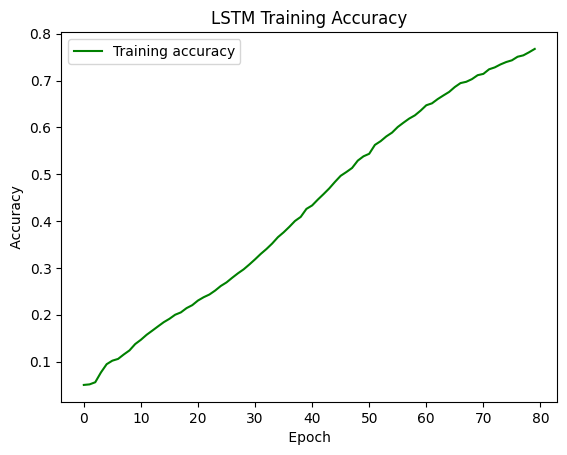

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history_LSTM.history['accuracy']
# loss = history.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
# plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

plt.title('LSTM Training Accuracy')
plt.xlabel(" Epoch ")
plt.ylabel(" Accuracy ")
plt.legend()

plt.savefig('Accuracy_LSTM.png', format='png')
plt.figure()



<ipython-input-15-79b8203887d3>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")


<Figure size 640x480 with 0 Axes>

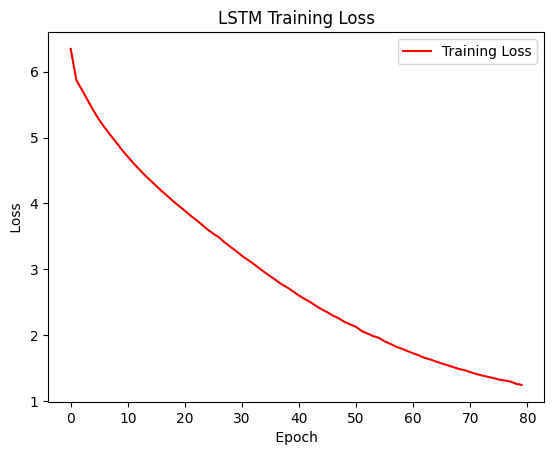

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# acc = history_LSTM.history['accuracy']
loss = history_LSTM.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
# plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

plt.title('LSTM Training Loss')
plt.xlabel(" Epoch ")
plt.ylabel(" Loss ")
plt.legend()

plt.savefig('Loss_LSTM.png', format='png')
plt.figure()



In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0),axis=-1)
        # np.argmax(model.predict(x_test), axis=-1)
        # print(predicted)
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

print (generate_text("Alice was beginning", 20, model, max_sequence_len))

Alice Was Beginning To Get Very Tired Of Sitting By Her Sister On The Locks Were Surprised That Which Might Not Left Larger


In [ ]:
import matplotlib.pyplot as plt
acc = history_LSTM.history['accuracy']
val_acc = history_LSTM.history['val_accuracy']
# loss = history.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, acc, 'b', label='Training accuracy',color = "blue")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',color = "green")

plt.title('Training and Validation accuracy')
plt.xlabel(" Epoch ")
plt.ylabel(" Accuracy ")
plt.legend()

plt.savefig('LSTM_Accuracy.png', format='png')
plt.figure()



KeyError: ignored

In [ ]:
# import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_bi = Sequential()
model_bi.add(Embedding(total_words, 580, input_length=max_sequence_len-1))
model_bi.add(Bidirectional(LSTM(250, return_sequences = True)))
model_bi.add(Dropout(0.2))
model_bi.add(LSTM(180))
model_bi.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_bi.add(Dense(total_words, activation='softmax'))
model_bi.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_bi.summary())

In [ ]:
# 183/183 [==============================] - 63s 346ms/step - loss: 0.9149 - accuracy: 0.8683
# history_BI_LSTM = model_bi.fit(predictors, label, epochs=80, validation_split=0.15, verbose=1)
history_BI_LSTM = model_bi.fit(predictors, label, epochs=80, verbose=1)


In [ ]:
import matplotlib.pyplot as plt
acc = history_BI_LSTM.history['accuracy']
# loss = history_BI_LSTM.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
# plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

plt.title('Bi-directional LSTM Training Accuracy')
plt.xlabel(" Epoch ")
plt.ylabel(" Accuracy ")
plt.legend()

plt.savefig('Accuracy_Bi_LSTM.png', format='png')
plt.figure()



In [ ]:
import matplotlib.pyplot as plt
# acc = history_BI_LSTM.history['accuracy']
loss = history_BI_LSTM.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
# plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

# plt.title('Training accuracy')
plt.title('Bi-directional LSTM Training loss')
plt.xlabel(" Epoch ")
plt.ylabel(" Loss ")
plt.legend()

plt.savefig('loss_Bi_LSTM.png', format='png')
plt.figure()



In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0),axis=-1)
        # np.argmax(model.predict(x_test), axis=-1)
        # print(predicted)
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

print (generate_text("Alice was beginning", 20, model_bi, max_sequence_len))

In [ ]:
model_rnn = Sequential()
model_rnn.add(Embedding(total_words, 580, input_length=max_sequence_len-1))
model_rnn.add(SimpleRNN(120, return_sequences = True))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(180))
model_rnn.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_rnn.add(Dense(total_words, activation='softmax'))
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_rnn.summary())

In [ ]:
history_RNN = model_rnn.fit(predictors, label, epochs=80, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
acc = history_RNN.history['accuracy']
# loss = history_RNN.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
# plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

plt.title('RNN Training Accuracy')
# plt.title('Training loss')
plt.xlabel(" Epoch ")
plt.ylabel(" Accuracy ")
plt.legend()

plt.savefig('Accuracy_RNN.png', format='png')
plt.figure()



In [ ]:
import matplotlib.pyplot as plt
# acc = history_RNN.history['accuracy']
loss = history_RNN.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
# plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

# plt.title('Training accuracy')
plt.title('RNN Training Loss')
plt.xlabel(" Epoch ")
# plt.ylabel(" Accuracy ")
plt.ylabel(" Loss ")
plt.legend()

plt.savefig('Loss_RNN.png', format='png')
plt.figure()



In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0),axis=-1)
        # np.argmax(model.predict(x_test), axis=-1)
        # print(predicted)
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

print (generate_text("Alice was beginning", 20, model_rnn, max_sequence_len))

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(total_words, 580, input_length=max_sequence_len-1))
model_gru.add(GRU(250, return_sequences = True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(180))
model_gru.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_gru.add(Dense(total_words, activation='softmax'))
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_gru.summary())

In [ ]:
history_GRU = model_gru.fit(predictors, label, epochs=80, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
acc = history_GRU.history['accuracy']
# loss = history_GRU.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
# plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

plt.title('GRU Training Accuracy')
# plt.title('Training loss')
plt.xlabel(" Epoch ")
plt.ylabel(" Accuracy ")
# plt.ylabel(" Loss ")
plt.legend()

plt.savefig('Accuracy_GRU.png', format='png')
# plt.savefig('Loss_RNN.png', format='png')
plt.figure()



In [ ]:
import matplotlib.pyplot as plt
# acc = history_GRU.history['accuracy']
loss = history_GRU.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
# plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

# plt.title('Training accuracy')
plt.title('GRU Training Loss')
plt.xlabel(" Epoch ")
# plt.ylabel(" Accuracy ")
plt.ylabel(" Loss ")
plt.legend()

# plt.savefig('Accuracy_GRU.png', format='png')
plt.savefig('Loss_GRU.png', format='png')
plt.figure()



In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0),axis=-1)
        # np.argmax(model.predict(x_test), axis=-1)
        # print(predicted)
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

print (generate_text("Alice was beginning", 20, model_gru, max_sequence_len))

In [ ]:
model_bi_gru = Sequential()
model_bi_gru.add(Embedding(total_words, 580, input_length=max_sequence_len-1))
model_bi_gru.add(Bidirectional(GRU(250, return_sequences = True)))
model_bi_gru.add(Dropout(0.2))
model_bi_gru.add(GRU(180))
model_bi_gru.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_bi_gru.add(Dense(total_words, activation='softmax'))
model_bi_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_bi_gru.summary())

In [ ]:
history__bi_GRU = model_bi_gru.fit(predictors, label, epochs=80, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
acc = history__bi_GRU.history['accuracy']
# loss = history__bi_GRU.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
# plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

plt.title('Bi-directional GRU Training Accuracy')
# plt.title('Training loss')
plt.xlabel(" Epoch ")
plt.ylabel(" Accuracy ")
# plt.ylabel(" Loss ")
plt.legend()

plt.savefig('Accuracy_Bi_GRU.png', format='png')
# plt.savefig('Loss_GRU.png', format='png')
plt.figure()



In [ ]:
import matplotlib.pyplot as plt
# acc = history__bi_GRU.history['accuracy']
loss = history__bi_GRU.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
# plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

# plt.title('Training accuracy')
plt.title('Bi-directional GRU Training Loss')
plt.xlabel(" Epoch ")
# plt.ylabel(" Accuracy ")
plt.ylabel(" Loss ")
plt.legend()

# plt.savefig('Accuracy_Bi_GRU.png', format='png')
plt.savefig('Loss_bi_GRU.png', format='png')
plt.figure()



In [ ]:
seed_text = " Alice was beginning  "
next_words = 10

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model_bi_gru.predict(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)


In [ ]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0),axis=-1)
        # np.argmax(model.predict(x_test), axis=-1)
        # print(predicted)
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

Alice Was Beginning To Get Very Tired Of Sitting By Her
 Sister On The Rats And Butter Is No Use In Good Terms


In [ ]:
print (generate_text("Alice was beginning", 20, model_bi_gru, max_sequence_len))

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
# plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, acc, 'b', label='Training accuracy',color = "green")
plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")

plt.title('Training accuracy')
plt.xlabel(" Epoch ")
plt.ylabel(" Accuracy ")
plt.legend()

plt.savefig('Accuracy.png', format='png')
plt.figure()



In [ ]:
plt.plot(epochs, acc, 'b', label='Training accuracy',color = "blue")
plt.plot(epochs, loss, 'b', label='Training Loss',color = "red")
plt.title('Training loss')
# plt.legend()
plt.xlabel(" Epoch ")
plt.ylabel(" Loss ")

plt.savefig('loss.png', format='png')
plt.show()

In [ ]:
seed_text = " We will make America safe again, and we will make America great again."
next_words = 100


In [ ]:
seed_text = " We will make America safe again, and we will make America great again."
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      output_word = word
        # if index == predicted:
        #     output_word = word
        #     break
    seed_text += " " + output_word
print(seed_text)

 We will make America safe again, and we will make America great again.
 completely completely completely completely completely completely completely
